In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
with open("comments.txt", "r") as f :
    all_comments=f.read().splitlines()
#all_comments = all_comments[0:100]

Have to know:
The numbers of sentences by comment.
The numbers of words by sentence.
the numbers of words by comment.

clean out all comments even before len comments?

[(0, 441), (22, 141), (25, 139), (18, 134), (15, 132), (16, 129), (23, 125), (26, 125), (19, 123), (29, 123)]


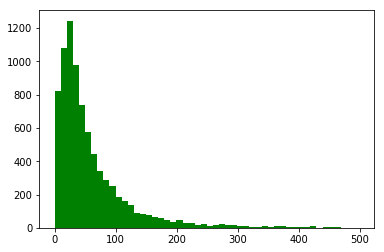

In [3]:
#print("nb of comments before :", len(all_comments))

lengths_comments = []
for comment in all_comments :
    length_comment = len(comment)
    if length_comment < 500 :
        lengths_comments.append(len(comment))
    else :
        all_comments.remove(comment)
        
#print("nb of comments after :", len(all_comments))

distribution1 = nltk.FreqDist(lengths_comments)
print(distribution1.most_common(10))

plt.hist(lengths_comments, 50, facecolor='green')
plt.show()

clean up the comments from those analysis

In [4]:
comments_sentences = []

for comment in all_comments :
    sentences = comment.split('.')
    #cleaned_sentences = list(filter(None, sentences))
    #comments_sentences.append(cleaned_sentences)
    comments_sentences.append(sentences)

[(0, 3931), (1, 208), (22, 206), (18, 196), (25, 193), (26, 192), (21, 188), (28, 187), (16, 179), (15, 179)]


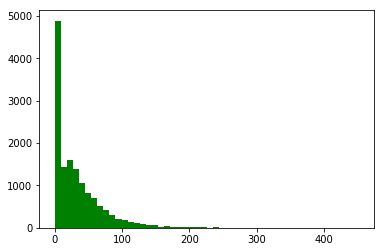

In [5]:
lengths_sentences = []

for comment in comments_sentences :
    for sentence in comment :
        #if len(sentence) <= 1 :
            #comment.remove(sentence)
        #else :
        lengths_sentences.append(len(sentence))
    
   
distribution1 = nltk.FreqDist(lengths_sentences)
print(distribution1.most_common(10))

plt.hist(lengths_sentences, 50, facecolor='green')
plt.show()

clean up the sentences form the analysis of that. List of list or just a list?

In [6]:
all_sentences = []
for comment in comments_sentences :
    for sentence in comment :
        if len(sentence) > 20 and len(sentence) < 50:
            all_sentences.append(sentence)
print(len(all_sentences))

4128


In [7]:
# def filter_tokenize(comments) :
#     #could add stemming
#     comments_tokenized = []
#     for comment in comments :
#         tokenized = word_tokenize(comment)
#         #filtered = [w.lower() for w in tokenized if not w.lower() in stop_words and w.isalpha()]
#         #comments_tokenized.append(filtered)
#     return (comments_tokenized)

In [8]:
#stop_words = set(stopwords.words("english"))

In [24]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=1000,
                                 min_df=0.002, stop_words="english",
                                 use_idf=True) #tokenizer=filter_tokenize, ngram_range=(1,3)

#tfidf_matrix = tfidf_vectorizer.fit_transform(all_comments)
tfidf_matrix = tfidf_vectorizer.fit_transform(all_sentences[0:1000])

In [25]:
print(tfidf_matrix.shape)

(1000, 405)


In [26]:
terms = tfidf_vectorizer.get_feature_names()
print(terms)

['000', '10', '1000', '10e', '12', '1250', '13', '1400', '15', '16', '20', '200', '2019', '300', '31', '400', '50', '500', '57', '58', '59', '650', '6t', '700', '750', '850', '900', '900k', 'a50', 'actually', 'ad', 'af', 'amazing', 'android', 'annoying', 'apple', 'apples', 'appreciated', 'arm', 'ask', 'aspect', 'ass', 'awesome', 'background', 'bad', 'battery', 'baymax', 'beats', 'beautiful', 'best', 'better', 'bezels', 'big', 'bigger', 'black', 'bought', 'boy', 'brand', 'broke', 'brown', 'brownlee', 'bruh', 'bucks', 'budget', 'buds', 'buy', 'buying', 'came', 'camera', 'cards', 'case', 'category', 'cause', 'channel', 'cheap', 'cheaper', 'check', 'chin', 'china', 'choice', 'class', 'clever', 'color', 'comes', 'comment', 'compact', 'compared', 'comparison', 'considered', 'content', 'convinced', 'cool', 'copy', 'copying', 'costs', 'couldn', 'country', 'creative', 'curved', 'cute', 'damn', 'day', 'deal', 'decent', 'definitely', 'design', 'device', 'did', 'didn', 'dislike', 'display', 'does'

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [28]:
from sklearn.cluster import KMeans

num_clusters = 50
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
#print(clusters)

In [29]:
import random
 
def colors(n):
  ret = []
  r = int(random.random() * 256)
  g = int(random.random() * 256)
  b = int(random.random() * 256)
  step = 256 / n
  for i in range(n):
    r += step
    g += step
    b += step
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    ret.append((r/255,g/255,b/255)) 
  return ret

In [30]:
colors_list = colors(50)
#print(colors_list)

In [31]:
cluster_colors = {}
i = 0
for color in colors_list :
    cluster_colors[i] = color
    i +=1
#print(cluster_colors)

In [43]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS



MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))

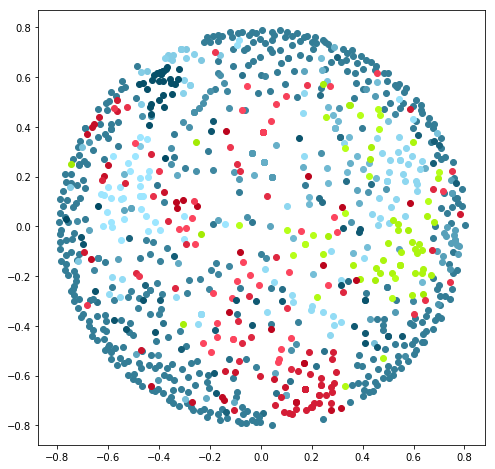

In [49]:
fig, ax = plt.subplots(figsize=(8, 8))
groups = df.groupby('label')
print(groups)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6, color=cluster_colors[name])#, mec='none'

In [34]:
terms = tfidf_vectorizer.get_feature_names()
print(terms)

from sklearn.cluster import KMeans


order_centroids = km.cluster_centers_.argsort()[:, ::-1]
#print(order_centroids)

for c in range(num_clusters):
    for i in order_centroids[c, :6] :
        print(terms[i])
    print()

['000', '10', '1000', '10e', '12', '1250', '13', '1400', '15', '16', '20', '200', '2019', '300', '31', '400', '50', '500', '57', '58', '59', '650', '6t', '700', '750', '850', '900', '900k', 'a50', 'actually', 'ad', 'af', 'amazing', 'android', 'annoying', 'apple', 'apples', 'appreciated', 'arm', 'ask', 'aspect', 'ass', 'awesome', 'background', 'bad', 'battery', 'baymax', 'beats', 'beautiful', 'best', 'better', 'bezels', 'big', 'bigger', 'black', 'bought', 'boy', 'brand', 'broke', 'brown', 'brownlee', 'bruh', 'bucks', 'budget', 'buds', 'buy', 'buying', 'came', 'camera', 'cards', 'case', 'category', 'cause', 'channel', 'cheap', 'cheaper', 'check', 'chin', 'china', 'choice', 'class', 'clever', 'color', 'comes', 'comment', 'compact', 'compared', 'comparison', 'considered', 'content', 'convinced', 'cool', 'copy', 'copying', 'costs', 'couldn', 'country', 'creative', 'curved', 'cute', 'damn', 'day', 'deal', 'decent', 'definitely', 'design', 'device', 'did', 'didn', 'dislike', 'display', 'does'

In [42]:
grouped_clusters = []
for i in range(num_clusters):
    grouped = [cluster for cluster in clusters if cluster == i]
    grouped_clusters.append(grouped)

for cluster in grouped_clusters :
    print(len(cluster))
print(grouped_clusters)

11
9
8
375
30
14
4
21
8
14
20
11
7
13
3
19
6
4
6
10
7
32
27
4
34
4
9
28
5
17
15
9
6
6
7
42
4
13
3
7
7
3
16
28
3
29
14
15
8
5
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2, 2, 2], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [35]:
i = 0
for cluster in clusters :
    if cluster == 0 :
        print(all_sentences[i])
    i += 1

print()
    
i = 0
for cluster in clusters :
    if cluster == 1 :
        print(all_sentences[i])
    i += 1
    
print()

i = 0
for cluster in clusters :
    if cluster == 2 :
        print(all_sentences[i])
    i += 1
    
print()

i = 0
for cluster in clusters :
    if cluster == 3 :
        print(all_sentences[i])
    i += 1

Who’s watching this on a xr
Not watching this on my s10e 😎😎
Am watching this on my  fkn s9
Watching this on iPhone XR 😂
Watching this on Pocophone f1
watching on my new blue s10e 😎
Anyone else watching on an iPhone
Y im watching this? Still using s5 until now
Watching on my iPhone XR
Idk why I'm watching this when I got the s10 plus
Watching this on my Note 4

who here is in love with baymax?
Can u send me BAYMAX WALLPAPER
I hate how Baymax's eye is slightly off
This Baymax wallpaper is awesome 😎😍
They hid the camera by Baymax's eye
I loved the baymax wallpaper
 The baymax one is so perfect too lol 😄😆🥳
I JUST NOTICED THE CAMERA WHAT BAYMAX'S EYE
That S10 wallpaper with baymax’s eye is clever af

Great review! I couldn't figure what one to get
That was a great continuous shot there
It’s a great phone, period
Phone is amazing Great Review
 S10Ee it is! Great vid
Great video I like your review
Seems like a great phone
These photos are great!!!

 He has this low key god-maker arrogance
I b